# **QSAR Model Building of Acetylcholinesterase Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

# Read in data

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv("schizophrenia_06_bioactivity_data_3class_pIC50_pubchem_fp.csv")

In [ ]:
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.522879
213,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.744727
214,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.050610
215,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879


In [ ]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
213,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
214,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
215,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataset.iloc[:,-1]
Y

,pIC50
0,3.000000
1,3.000000
2,3.000000
3,3.000000
4,3.000000
...,...
212,3.522879
213,4.744727
214,5.050610
215,4.522879


# Remove low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP15,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP143,PubchemFP145,PubchemFP146,...,PubchemFP712,PubchemFP716,PubchemFP734,PubchemFP737,PubchemFP755,PubchemFP776,PubchemFP779,PubchemFP797,PubchemFP800,PubchemFP818
0,0,0,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0,1,0,1,0,1,1,1,1,1,...,0,0,1,0,0,0,0,1,0,0
213,1,1,1,1,0,1,0,1,1,1,...,0,0,0,1,0,1,0,0,1,0
214,1,1,1,1,0,1,0,1,1,1,...,1,0,0,1,0,1,0,0,1,0
215,1,1,1,1,0,1,0,1,1,1,...,1,0,0,1,0,1,0,0,1,0


In [ ]:
X.to_csv('descriptor_list.csv', index = False)

In [ ]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9194062286587021

## Model Prediction

In [ ]:
Y_pred = model.predict(X)
Y_pred

array([3.00104576, 3.00636606, 2.99882599, 3.25727746, 3.34029807,
       3.12363912, 3.00750333, 3.0126854 , 3.0133203 , 3.01900902,
       3.1069639 , 5.27132874, 5.18190632, 5.14298498, 4.4270044 ,
       5.14298498, 5.29911781, 6.03688731, 5.89364963, 6.39072081,
       6.17753137, 6.13314934, 5.89364963, 6.9763172 , 6.64512919,
       6.29894614, 6.29894614, 5.97901133, 5.65836866, 6.00116853,
       5.21179793, 5.21179793, 5.8613024 , 5.99032407, 6.11854887,
       5.62179009, 5.99394037, 5.99394037, 5.5390031 , 5.65431026,
       5.34115382, 6.43835718, 5.9432157 , 3.82611817, 3.66028967,
       3.56866906, 3.46098092, 3.98186939, 3.71143862, 3.67235275,
       3.69018105, 3.62627023, 3.77087729, 3.64157843, 3.6591683 ,
       3.85842222, 3.99713727, 3.98759485, 3.93779121, 3.98759485,
       3.93465393, 3.77087729, 3.60208443, 3.90575656, 3.83745261,
       3.84280023, 3.69273391, 3.71183091, 3.64307318, 3.07583445,
       2.81081351, 3.10132742, 3.10491996, 2.90417363, 3.08605

## Model Performance

In [ ]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.11
Coefficient of determination (R^2): 0.92


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

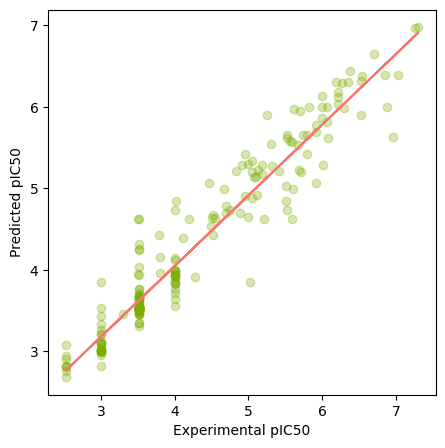

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('schizophrenia_model.pkl', 'wb'))